# Title

In [4]:
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import urllib
import pandas as pd
import numpy as np
import xarray as xr
import datetime
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML

%matplotlib inline


In [61]:
# Data 
path = r"E:\datasets\ERA5_mon_1979-2019_total_precipitation.nc"
data = xr.open_dataset(path)
data.head()

<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 5, time: 5)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 89.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 1979-05-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-08 15:31:30 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [7]:
# Creating a colormap
nws_precip_colors = [
    "#ffffff",  # 0.01 - 0.10 inches
    "#019ff4",  # 0.10 - 0.25 inches
    "#0300f4",  # 0.25 - 0.50 inches
    "#02fd02",  # 0.50 - 0.75 inches
    "#01c501",  # 0.75 - 1.00 inches
    "#008e00",  # 1.00 - 1.50 inches
    "#fdf802",  # 1.50 - 2.00 inches
    "#e5bc00",  # 2.00 - 2.50 inches
    "#fd9500",  # 2.50 - 3.00 inches
    "#fd0000",  # 3.00 - 4.00 inches
    "#d40000",  # 4.00 - 5.00 inches
    "#bc0000",  # 5.00 - 6.00 inches
    "#f800fd",  # 6.00 - 8.00 inches
    "#9854c6",  # 8.00 - 10.00 inches
    "#fdfdfd"   # 10.00+
]
precip_colormap = matplotlib.colors.ListedColormap(nws_precip_colors)


In [35]:
precipData = data.tp * (3000.0 / 25.4)

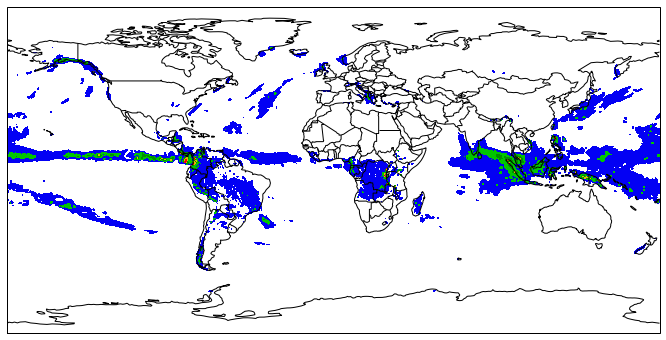

In [49]:
i = 10

fig = plt.figure(figsize = (12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='black')
ax.contourf(data.tp.isel(time=i).longitude, data.tp.isel(time=i).latitude, precipData.isel(time=i), 10, cmap = precip_colormap)

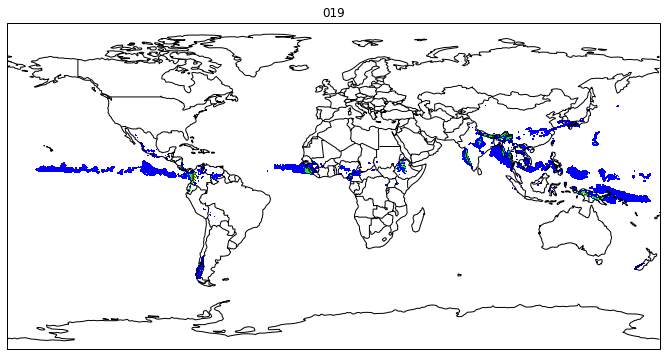

In [50]:
fig = plt.figure(figsize = (12,6))
ax = plt.axes(projection=ccrs.PlateCarree())

def animate(i):
    ax.clear()
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='black')
    ax.add_feature(cartopy.feature.COASTLINE, edgecolor='black')
    ax.contourf(data.tp.isel(time=i).longitude, data.tp.isel(time=i).latitude, precipData.isel(time=i), 10, cmap = precip_colormap)
    ax.set_title('%03d'%(i)) 

interval = 0.1#in seconds     
ani = animation.FuncAnimation(fig,animate,20,interval=interval*1e3,blit=False)
HTML(ani.to_jshtml())

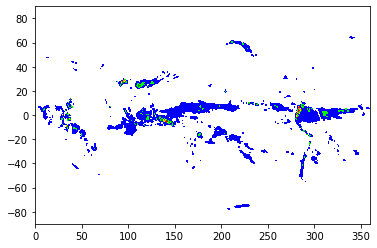

In [59]:
i = 15

plt.contourf(data.tp.isel(time=i).longitude, data.tp.isel(time=i).latitude, precipData.isel(time=i), 10, cmap = precip_colormap)